In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
# %cd drive/MyDrive/NN

In [4]:
def upsample_label(temp_x, temp_y):
    y_time_list = temp_y['time'].values
    y_label = temp_y['label'].values
    jdx = 0
    label_list = []
    for index,row in temp_x.iterrows():
        try:
            if row['time'] > y_time_list[jdx]:
                jdx+=1
            label_list.append(y_label[jdx])
        except:
            label_list.append(y_label[jdx - 1])
    return label_list

In [5]:
filepath = 'TrainingData/'
column_list = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','subject', 'time', 'label']
final_df = pd.DataFrame([], columns = column_list)
for i in glob.glob(filepath + '*.csv'):
    df_type = i.split('.')[0].split('__')[1]
    file_name = i.split('\\')[1].split('__')[0]
    if df_type == 'x':
        x = open(filepath + file_name + '__x.csv')
        x = pd.read_csv(x)
        x['subject'] = [file_name] * x.shape[0]
        
        x_time = open(filepath + file_name + '__x_time.csv')
        x_time = pd.read_csv(x_time)
        x['time'] = x_time
        
        y = open(filepath + file_name + '__y.csv')
        y = pd.read_csv(y)
        y['subject'] = [file_name] * y.shape[0]
        
        y_time = open(filepath + file_name + '__y_time.csv')
        y_time = pd.read_csv(y_time)
        y['time'] = y_time
        
        y.columns = ['label', 'subject', 'time']
        label_list = upsample_label(x, y)
        x['label'] = label_list
        x.columns = column_list
        final_df = pd.concat([final_df, x], ignore_index=True)


In [6]:
final_df.shape

(1341617, 9)

In [7]:
final_df.to_csv('final_dataset.csv')

In [8]:
final_df.head(20)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,subject,time,label
0,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345,subject_001_01,0.025,0
1,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159,subject_001_01,0.050,0
2,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223,subject_001_01,0.075,0
3,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111,subject_001_01,0.100,0
4,4.226515,8.273807,2.851742,0.012534,0.000445,-0.016830,subject_001_01,0.125,0
5,4.532063,8.398341,2.856682,0.014484,0.028769,-0.011091,subject_001_01,0.150,0
6,4.433669,8.294719,2.823521,0.016340,-0.029434,-0.008998,subject_001_01,0.175,0
7,4.160676,8.260676,2.827568,0.011222,-0.016748,-0.006027,subject_001_01,0.200,0
8,4.432763,8.272613,2.790050,-0.002715,0.023094,0.012222,subject_001_01,0.225,0
9,4.511362,8.256774,2.820538,-0.002248,0.001547,0.011137,subject_001_01,0.250,0


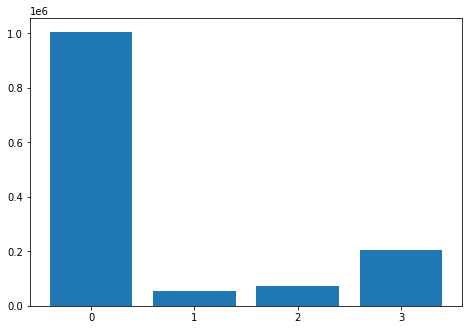

In [9]:
x_label = ['0', '1', '2', '3']
y_label = []
for i in range(4):
    y_label.append(final_df['label'].value_counts()[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_label, y_label)
plt.show()

In [10]:
print(final_df['label'].value_counts())

0    1006897
3     206436
2      73068
1      55216
Name: label, dtype: int64


In [ ]:
class_0 = (1/(final_df['label'].value_counts()[0]/final_df.shape[0])).round(3)
class_1 = (1/(final_df['label'].value_counts()[1]/final_df.shape[0])).round(3)
class_2 = (1/(final_df['label'].value_counts()[2]/final_df.shape[0])).round(3)
class_3 = (1/(final_df['label'].value_counts()[3]/final_df.shape[0])).round(3)

print(class_0, class_1, class_2, class_3)

1.332 24.298 18.361 6.499


In [8]:
final_df = pd.read_csv('Results/final_dataset.csv',index_col=0)

In [9]:
final_df.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,subject,time,label
0,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345,subject_001_01,0.025,0
1,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159,subject_001_01,0.050,0
2,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223,subject_001_01,0.075,0
3,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111,subject_001_01,0.100,0
4,4.226515,8.273807,2.851742,0.012534,0.000445,-0.016830,subject_001_01,0.125,0


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_df['label'])
X = final_df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(X_train)
X_train = scaler.fit_transform(X_train)
print()
print(X_train)
scaler.standard deviation

SyntaxError: invalid syntax (<ipython-input-11-d8fec9242159>, line 7)

In [13]:
# random forest with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

weights = {0:class_0, 1:class_1, 2:class_2, 3:class_3}
model = RandomForestClassifier(n_estimators=10, class_weight=weights)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('Test Accuracy : %.3f'%(y_preds == y_test).mean())
print('Test Accuracy : %.3f'%model.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%model.score(X_train, y_train))


NameError: name 'class_0' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_preds))

array([[290758,   1840,   2746,   6808],
       [ 10981,   4544,    454,    698],
       [  8879,    284,  12241,    302],
       [ 51588,    747,    581,   9035]])

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88    302152
           1       0.61      0.27      0.38     16677
           2       0.76      0.56      0.65     21706
           3       0.54      0.15      0.23     61951

    accuracy                           0.79    402486
   macro avg       0.68      0.49      0.53    402486
weighted avg       0.75      0.79      0.74    402486



In [ ]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 704745, 3: 144485, 2: 51362, 1: 38539})


In [49]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

models = [RandomForestClassifier(n_estimators=100), AdaBoostClassifier()]
for model in models:
  over = SMOTE(sampling_strategy={1:100000, 2:120000, 3:200000})
  under = RandomUnderSampler(sampling_strategy={0:400000})
  steps = [('over', over), ('under', under), ('model', model)]
  pipeline = Pipeline(steps=steps)
  pipeline.fit(X_train, y_train)
  print(pipeline.score(X_test, y_test))
  y_preds = pipeline.predict(X_test)
  print(model)
  print(classification_report(y_test, y_preds))

0.748773870395492
RandomForestClassifier(n_estimators=10)
              precision    recall  f1-score   support

           0       0.84      0.85      0.85    302152
           1       0.42      0.49      0.45     16677
           2       0.62      0.73      0.67     21706
           3       0.39      0.34      0.36     61951

    accuracy                           0.75    402486
   macro avg       0.57      0.60      0.58    402486
weighted avg       0.75      0.75      0.75    402486

0.7183231217980253
AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.78      0.91      0.84    302152
           1       0.16      0.14      0.15     16677
           2       0.34      0.45      0.39     21706
           3       0.29      0.03      0.06     61951

    accuracy                           0.72    402486
   macro avg       0.39      0.38      0.36    402486
weighted avg       0.66      0.72      0.67    402486



In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model = GradientBoostingClassifier()
over = SMOTE(sampling_strategy={1:100000, 2:120000, 3:200000})
under = RandomUnderSampler(sampling_strategy={0:400000})
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

NameError: name 'SMOTE' is not defined

In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(n_estimators=100)
over = SMOTE(sampling_strategy={1:100000, 2:120000, 3:200000})
under = RandomUnderSampler(sampling_strategy={0:400000})

steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
y_preds = pipeline.predict(X_train)
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    704950
           1       0.85      1.00      0.92     38543
           2       0.87      1.00      0.93     51020
           3       0.85      1.00      0.92    144618

    accuracy                           0.96    939131
   macro avg       0.89      0.99      0.93    939131
weighted avg       0.96      0.96      0.96    939131



In [85]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(n_estimators=100)
over = SMOTE(sampling_strategy={1:100000, 2:120000, 3:200000})
under = RandomUnderSampler(sampling_strategy={0:400000})



steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
X_test = scaler.transform(X_test)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))



0.7730231610540491
RandomForestClassifier()
[0 2 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86    301947
           1       0.48      0.53      0.50     16673
           2       0.63      0.76      0.69     22048
           3       0.46      0.36      0.40     61818

    accuracy                           0.77    402486
   macro avg       0.60      0.63      0.61    402486
weighted avg       0.76      0.77      0.77    402486



In [88]:
X_train

array([[-0.03991187,  0.76407571, -0.7906735 , -1.09740982,  1.28298977,
         1.51212765],
       [-0.53993387, -2.41734255, -0.43550825, -1.18399956,  1.93321134,
         0.96362022],
       [-0.98267885,  0.1432864 ,  0.26738714, -0.36147261,  0.38672481,
         0.48917139],
       ...,
       [ 0.77027474, -0.13522363, -0.28536274, -0.13909152, -1.02308146,
        -0.87342782],
       [ 0.14903202,  0.12588563, -0.37090766,  0.10900902, -0.19497761,
        -0.19390011],
       [-0.65863956,  0.28214282,  1.19969276, -0.63789313, -0.21585332,
        -0.9528795 ]])

In [121]:
filepath = 'TestData/'
column_list = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','subject', 'time']
final_df = pd.DataFrame([], columns = column_list)
for i in glob.glob(filepath + '*.csv'):
    df_type = i.split('.')[0].split('__')[1]
    file_name = i.split('\\')[1].split('__')[0]
    if df_type == 'x':
        x = open(filepath + file_name + '__x.csv')
        x = pd.read_csv(x)
        x['subject'] = [file_name] * x.shape[0]
        
        x_time = open(filepath + file_name + '__x_time.csv')
        x_time = pd.read_csv(x_time)
        x['time'] = x_time
        
        #y_time = open(filepath + file_name + '__y_time.csv')
        #y_time = pd.read_csv(y_time)
        #y['time'] = y_time
        
        #y.columns = ['label', 'subject', 'time']
        #label_list = upsample_label(x, y)
        #x['label'] = label_list
        x.columns = column_list
        final_df = pd.concat([final_df, x], ignore_index=True)

In [122]:
X_test = final_df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']]

In [123]:
final_df['label'] = pipeline.predict(X_test)

In [124]:
df_subject = final_df.groupby('subject')

In [125]:
from collections import Counter
for subject, df in df_subject:
    print(Counter(df['label']))
    df['label'].to_csv('TestData/' + subject + '__y.csv', header = False, index = False)
    

Counter({0: 28246, 3: 5085, 1: 2993, 2: 1666})
Counter({0: 34070, 3: 9039, 1: 3133, 2: 2838})
Counter({0: 40274, 3: 5766, 2: 3263, 1: 2457})
Counter({0: 36501, 2: 4121, 3: 2566, 1: 2130})


In [126]:
filepath = 'TestData/'
for i in glob.glob(filepath + '*.csv'):
    df_type = i.split('.')[0].split('__')[1]
    file_name = i.split('\\')[1].split('__')[0]
    if df_type == 'x':
        x = open(filepath + file_name + '__x.csv')
        x = pd.read_csv(x, header=None)
        
        x_time = open(filepath + file_name + '__x_time.csv')
        x_time = pd.read_csv(x_time, header=None)

        y_time = open(filepath + file_name + '__y_time.csv')
        y_time = pd.read_csv(y_time, header=None)
        
        y = open(filepath + file_name + '__y.csv')
        y = pd.read_csv(y, header=None)
        
        label_list = downsample_label(x_time, y_time, y)
        pd.DataFrame(label_list).to_csv(file_name+'__y.csv', header = False, index = False)

In [127]:
def downsample_label(x_time, y_time, labels):
    x_time_list = x_time.values
    y_time_list = y_time.values
    x_label = labels.values
    prev_label = x_label[0][0]
    jdx = 0
    idx = 0
    label_list = []
    
    while(jdx < len(x_time_list)):
        try:
            if x_time_list[jdx][0] > y_time_list[idx][0]:
                prev_label = x_label[jdx][0]
                label_list.append(prev_label)
                idx +=1
            jdx += 1
        except:
            break
    return label_list

In [56]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

model=RandomForestClassifier(n_estimators=100)
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
steps = [('r', resample), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(classification_report(y_test, y_preds))

0.6009500951585893
RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.92      0.57      0.70    302152
           1       0.28      0.70      0.40     16677
           2       0.47      0.84      0.60     21706
           3       0.30      0.65      0.41     61951

    accuracy                           0.60    402486
   macro avg       0.49      0.69      0.53    402486
weighted avg       0.77      0.60      0.64    402486



<AxesSubplot:xlabel='acc_x', ylabel='acc_y'>

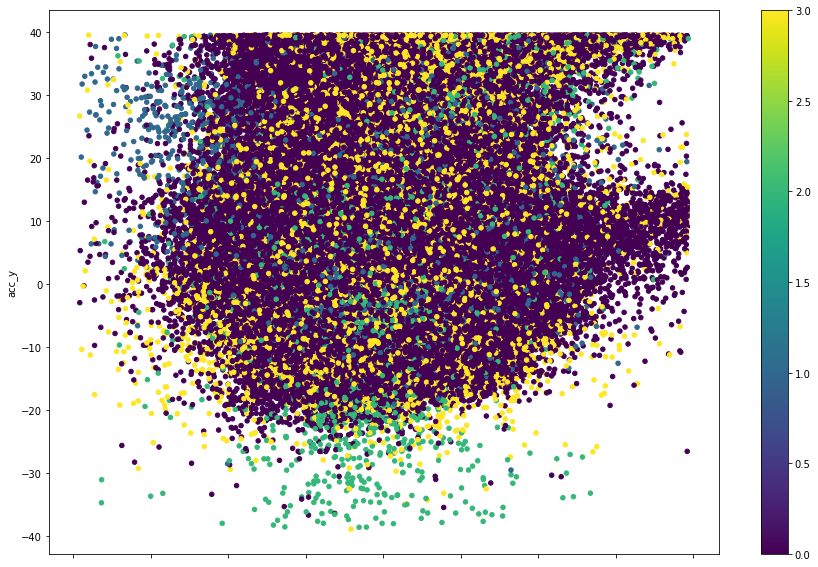

In [74]:
X_train.plot.scatter(x='acc_x', y='acc_y', c=y_train, colormap='viridis', figsize=(15,10))

<AxesSubplot:xlabel='acc_x', ylabel='acc_y'>

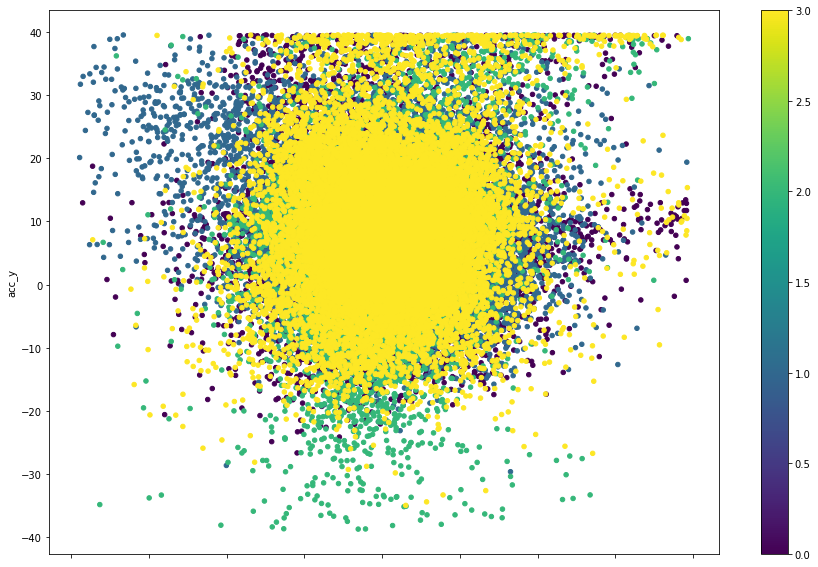

In [75]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='not minority')
under_df = under.fit_resample(X_train, y_train)
under_df[0].plot.scatter(x='acc_x', y='acc_y', c=under_df[1], colormap='viridis', figsize=(15,10))

In [76]:
pd.DataFrame(under_df[1]).value_counts()

0    38543
1    38543
2    38543
3    38543
dtype: int64

<AxesSubplot:xlabel='acc_x', ylabel='acc_y'>

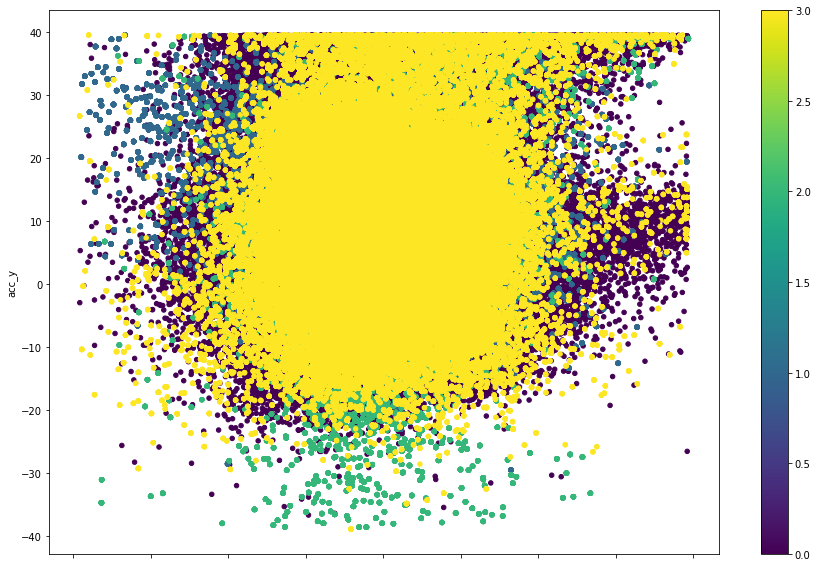

In [77]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy='not majority')
over_df = over.fit_resample(X_train, y_train)
over_df[0].plot.scatter(x='acc_x', y='acc_y', c=over_df[1], colormap='viridis', figsize=(15,10))

In [78]:
pd.DataFrame(over_df[1]).value_counts()

0    704950
1    704950
2    704950
3    704950
dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy='not majority')
over_df = over.fit_resample(X_train, y_train)
over_df[0].plot.scatter(x='acc_x', y='acc_y', c=over_df[1], colormap='viridis', figsize=(15,12))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [80]:
pd.DataFrame(over_df[1]).value_counts()

0    704950
1    704950
2    704950
3    704950
dtype: int64

<AxesSubplot:xlabel='acc_x', ylabel='acc_y'>

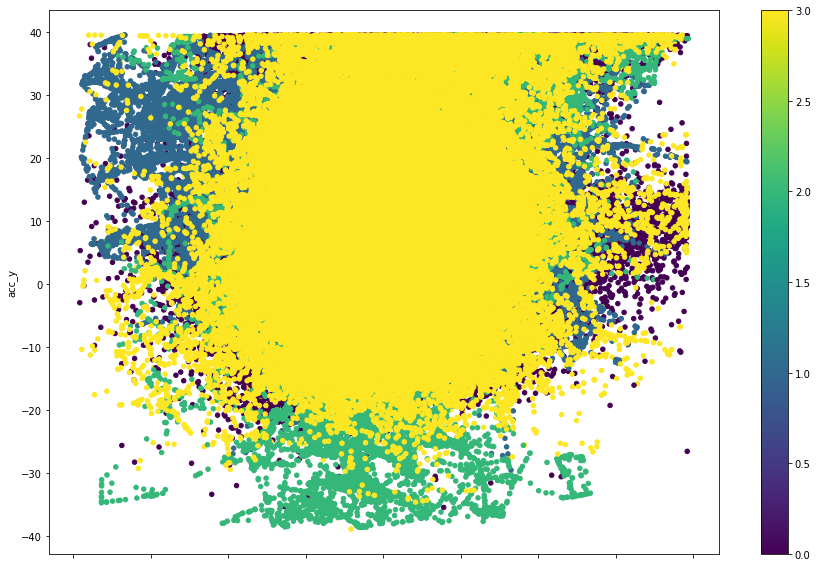

In [82]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='not minority'))
re_df = resample.fit_resample(X_train, y_train)
re_df[0].plot.scatter(x='acc_x', y='acc_y', c=re_df[1], colormap='viridis', figsize=(15,10))

In [83]:
pd.DataFrame(re_df[1]).value_counts()

0    704950
2    703939
1    703695
3    697903
dtype: int64

<AxesSubplot:xlabel='acc_x', ylabel='acc_y'>

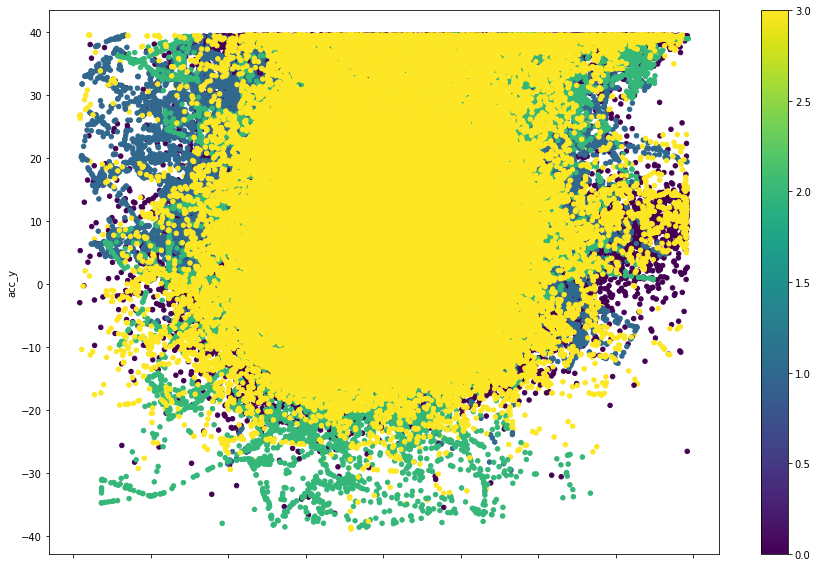

In [87]:
from imblearn.over_sampling import ADASYN 
over = ADASYN (sampling_strategy='auto', random_state=42)
over_df = over.fit_resample(X_train, y_train)
over_df[0].plot.scatter(x='acc_x', y='acc_y', c=over_df[1], colormap='viridis', figsize=(15,10))

In [88]:
pd.DataFrame(over_df[1]).value_counts()

2    710114
1    709298
0    704950
3    666521
dtype: int64

In [57]:
model=RandomForestClassifier(n_estimators=100)
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

0.3425883136307847
RandomForestClassifier()
[0 3 3 ... 3 3 0]
              precision    recall  f1-score   support

           0       0.97      0.18      0.30    302152
           1       0.35      0.58      0.44     16677
           2       0.49      0.82      0.61     21706
           3       0.20      0.91      0.33     61951

    accuracy                           0.34    402486
   macro avg       0.50      0.62      0.42    402486
weighted avg       0.80      0.34      0.33    402486



In [ ]:
model=RandomForestClassifier(n_estimators=100)
under = RandomUnderSampler(sampling_strategy='not minority')
steps = [('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

In [58]:
model=RandomForestClassifier(n_estimators=100)
over = SMOTE(sampling_strategy='minority')
steps = [('over', over),('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

0.7765338421709078
RandomForestClassifier()
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87    302152
           1       0.33      0.68      0.44     16677
           2       0.81      0.57      0.67     21706
           3       0.65      0.14      0.23     61951

    accuracy                           0.78    402486
   macro avg       0.65      0.58      0.55    402486
weighted avg       0.78      0.78      0.75    402486



In [ ]:
model=RandomForestClassifier(n_estimators=100)
over = SMOTE(sampling_strategy='not majority')
steps = [('over', over),('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

In [59]:
from imblearn.over_sampling import RandomOverSampler
model=RandomForestClassifier(n_estimators=100)
over = RandomOverSampler(sampling_strategy='minority')
steps = [('over', over),('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

0.7971705848153725
RandomForestClassifier()
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88    302152
           1       0.59      0.39      0.47     16677
           2       0.79      0.59      0.68     21706
           3       0.64      0.15      0.24     61951

    accuracy                           0.80    402486
   macro avg       0.71      0.52      0.57    402486
weighted avg       0.77      0.80      0.75    402486



In [ ]:
from imblearn.over_sampling import RandomOverSampler
model=RandomForestClassifier(n_estimators=100)
over = RandomOverSampler(sampling_strategy='not majority')
steps = [('over', over),('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

In [86]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

model=RandomForestClassifier(criterion='entropy')
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='not minority'))
# Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

0.7292676018544745
RandomForestClassifier(criterion='entropy')
[0 2 0 ... 2 0 0]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83    301947
           1       0.37      0.63      0.46     16673
           2       0.56      0.80      0.66     22048
           3       0.39      0.46      0.42     61818

    accuracy                           0.73    402486
   macro avg       0.55      0.67      0.59    402486
weighted avg       0.76      0.73      0.74    402486



In [ ]:
from imblearn.over_sampling import ADASYN 

model=RandomForestClassifier(criterion='entropy')
over = ADASYN (sampling_strategy='auto', random_state=42)
steps = [('over', over),('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))
y_preds = pipeline.predict(X_test)
print(model)
print(y_preds)
print(classification_report(y_test, y_preds))

In [31]:
folder = 'Results/'
test_preds = {}
for i in glob.glob(folder +'*.csv'):
    if i.endswith('_y.csv'):
        name = i.split('\\')[1].split('.')[0]
        test_preds[name] = pd.read_csv(i)

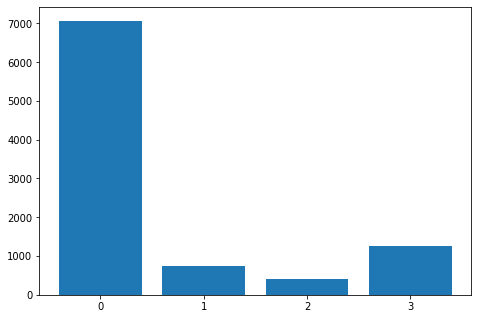

In [52]:
import matplotlib.pyplot as plt
df = test_preds['subject_009_01__y'].value_counts()
x1 = ['0', '1', '2', '3']
y1 = [None] * 4
for i in x1:
    y1[int(i)] = df[int(i)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x1,y1)
plt.show()

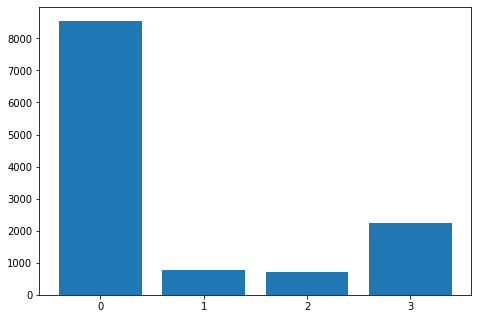

In [53]:
df = test_preds['subject_010_01__y'].value_counts()
x2 = ['0', '1', '2', '3']
y2 = [None] * 4
for i in x2:
    y2[int(i)] = df[int(i)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x2,y2)
plt.show()

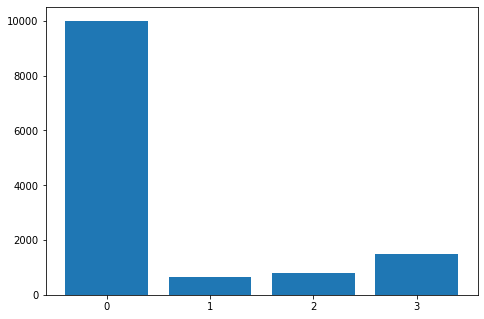

In [55]:
df = test_preds['subject_011_01__y'].value_counts()
x3 = ['0', '1', '2', '3']
y3 = [None] * 4
for i in x3:
    y3[int(i)] = df[int(i)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x3,y3)
plt.show()

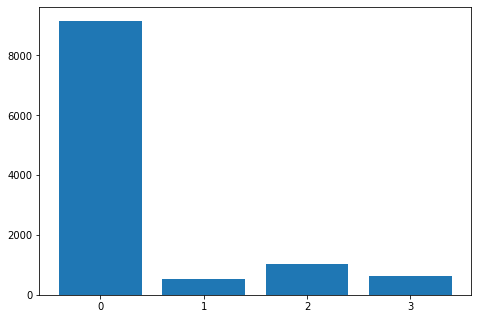

In [56]:
df = test_preds['subject_012_01__y'].value_counts()
x4 = ['0', '1', '2', '3']
y4 = [None] * 4
for i in x4:
    y4[int(i)] = df[int(i)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x4,y4)
plt.show()

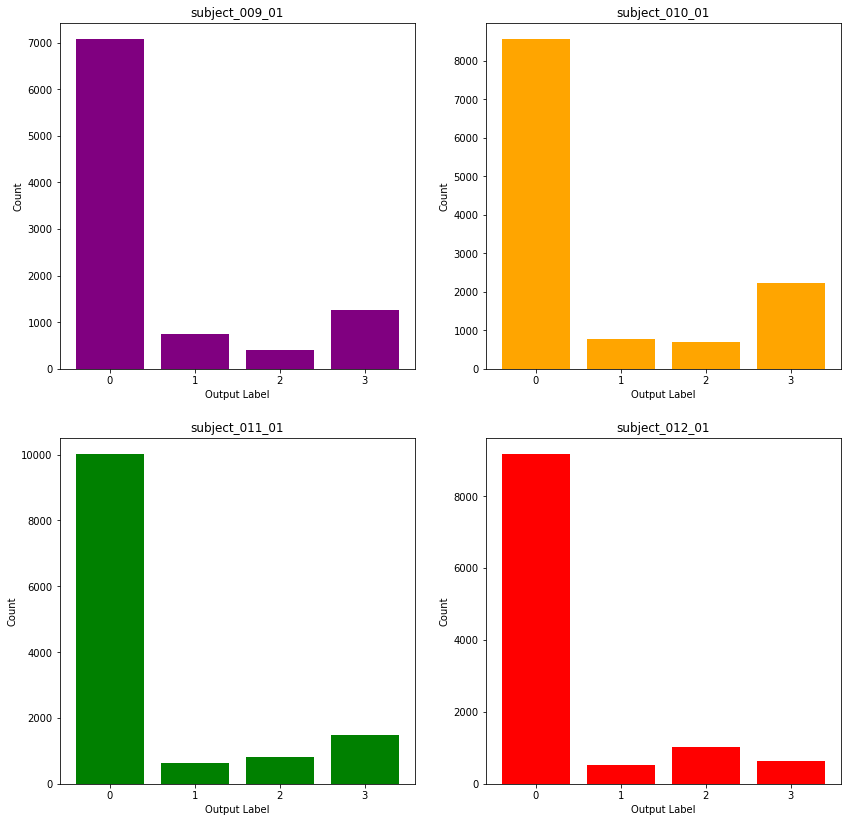

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(14,14))

plt.subplot(2, 2, 1)
plt.title("subject_009_01")
plt.bar(x1,y1, color='purple')
plt.xlabel('Output Label')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.title("subject_010_01")
plt.bar(x2,y2, color='orange')
plt.xlabel('Output Label')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.title("subject_011_01")
plt.bar(x3,y3, color='green')
plt.xlabel('Output Label')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.title("subject_012_01")
plt.bar(x4,y4, color='red')
plt.xlabel('Output Label')
plt.ylabel('Count')

plt.show()